<a href="https://colab.research.google.com/github/Scorpion7812/Test-2-Mtrand/blob/master/try-alpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib mplfinance scikit-learn tensorflow requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

def calculate_next_values(data):
    timestamps = list(data.keys())
    high_values = [float(data[timestamp]["2. high"]) for timestamp in timestamps]
    low_values = [float(data[timestamp]["3. low"]) for timestamp in timestamps]
    close_values = [float(data[timestamp]["4. close"]) for timestamp in timestamps]

    next_high = max(high_values)
    next_low = min(low_values)
    next_close = close_values[-1]

    return next_high, next_low, next_close

data_json = '''
{
    "2023-08-14 11:54:00": {
            "1. open": "1.0920",
            "2. high": "1.0922",
            "3. low": "1.0920",
            "4. close": "1.0921",
            "5. volume": "0"
        },
        "2023-08-14 11:53:00": {
            "1. open": "1.0922",
            "2. high": "1.0923",
            "3. low": "1.0920",
            "4. close": "1.0920",
            "5. volume": "0"
        },
        "2023-08-14 11:52:00": {
            "1. open": "1.0923",
            "2. high": "1.0923",
            "3. low": "1.0922",
            "4. close": "1.0923",
            "5. volume": "0"
        }
}
'''

data = json.loads(data_json)
next_high, next_low, next_close = calculate_next_values(data)

print("Next Higher Value:", next_high)
print("Next Lower Value:", next_low)
print("Next Close Value:", next_close)

# Convert data into a DataFrame
ohlc = []
for timestamp, values in data.items():
    ohlc.append((
        pd.Timestamp(timestamp),
        float(values["1. open"]),
        float(values["2. high"]),
        float(values["3. low"]),
        float(values["4. close"])
    ))

df = pd.DataFrame(ohlc, columns=["timestamp", "open", "high", "low", "close"])
df.set_index("timestamp", inplace=True)

# Create a candlestick chart
fig, ax = plt.subplots(figsize=(10, 6))
mpf.plot(df, type='candle', ax=ax, title="Candlestick Chart")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate sample data (replace this with your actual data)
timestamps = pd.date_range(start='2023-08-14 09:00:00', end='2023-08-14 10:00:00', freq='1T')
data = {
    'timestamp': timestamps,
    'open': np.random.uniform(1.085, 1.095, len(timestamps)),
    'high': np.random.uniform(1.095, 1.105, len(timestamps)),
    'low': np.random.uniform(1.080, 1.090, len(timestamps)),
    'close': np.random.uniform(1.085, 1.095, len(timestamps))
}
df = pd.DataFrame(data)
df.set_index('timestamp', inplace=True)

# Convert data to time series sequences
sequence_length = 10  # Number of past time steps to consider
feature_cols = ['open', 'high', 'low', 'close']
target_col = 'high'  # Predicting highs for example

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[feature_cols])

X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i, df.columns.get_loc(target_col)])

X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build and train an LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predictions for the next time period
last_sequence = scaled_data[-sequence_length:]
next_prediction = model.predict(np.array([last_sequence]))[0][0]
next_prediction = scaler.inverse_transform([[0, 0, 0, next_prediction]])[0][-1]

print("Next High Prediction:", next_prediction)

# Create candlestick chart
ohlc = df[['open', 'high', 'low', 'close']]
mpf.plot(ohlc, type='candle', title="Candlestick Chart")

plt.show()

                     1. open  2. high  3. low  4. close 5. volume
2023-08-16 00:50:00   1.0908   1.0909  1.0907    1.0909         0
2023-08-16 00:45:00   1.0908   1.0909  1.0907    1.0908         0
2023-08-16 00:40:00   1.0908   1.0909  1.0907    1.0908         0
2023-08-16 00:35:00   1.0908   1.0909  1.0907    1.0909         0
2023-08-16 00:30:00   1.0907   1.0909  1.0907    1.0908         0
Next High Prediction: 1.0905000000000002
Next Low Prediction: 1.0902999999999998
Next Timestamp: 2023-08-15 16:40:00
-----after-----
                     1. open  2. high  3. low  4. close
2023-08-16 00:50:00   1.0908   1.0909  1.0907    1.0909
2023-08-16 00:45:00   1.0908   1.0909  1.0907    1.0908
2023-08-16 00:40:00   1.0908   1.0909  1.0907    1.0908
2023-08-16 00:35:00   1.0908   1.0909  1.0907    1.0909
2023-08-16 00:30:00   1.0907   1.0909  1.0907    1.0908
...                      ...      ...     ...       ...
2023-08-15 16:50:00   1.0903   1.0904  1.0903    1.0903
2023-08-15 16:45:00   1

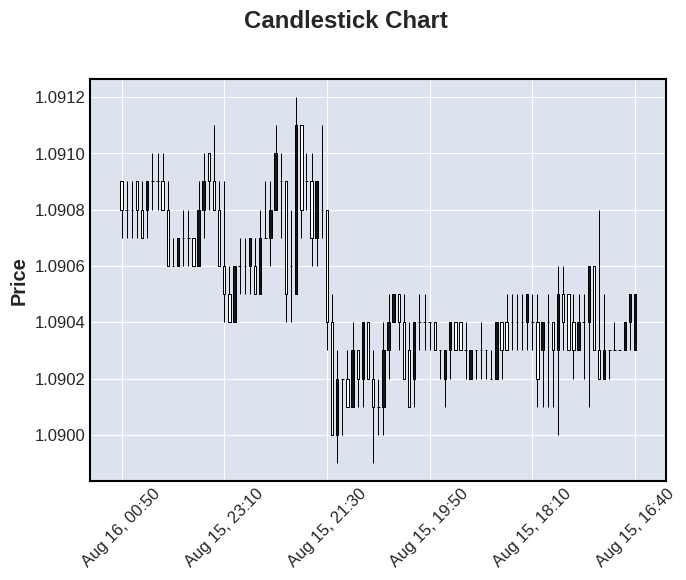

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import requests
from datetime import datetime, timedelta

url = "https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=EURUSD&interval=5min&apikey=IC5XJVI4EF31VSZJ"

payload = {}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
resData = response.text

data = json.loads(resData)

# Convert JSON data to a DataFrame
df = pd.DataFrame.from_dict(data["Time Series (5min)"], orient="index")
df.index = pd.to_datetime(df.index)

df[["1. open", "2. high", "3. low", "4. close"]] = df[
    ["1. open", "2. high", "3. low", "4. close"]
].astype(float)
print(df.head())

# Prepare feature data
feature_cols = ["1. open", "2. high", "3. low", "4. close"]
X = df[feature_cols].values

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create and train linear regression models
model_high = LinearRegression()
model_high.fit(X_scaled, df["2. high"])

model_low = LinearRegression()
model_low.fit(X_scaled, df["3. low"])

# Predictions for the next 5-minute time frame
last_observation = X_scaled[-1].reshape(1, -1)
next_high = model_high.predict(last_observation)[0]
next_low = model_low.predict(last_observation)[0]

# Get the next timestamp
last_timestamp = df.index[-1]
next_timestamp = last_timestamp + timedelta(minutes=5)

print("Next High Prediction:", next_high)
print("Next Low Prediction:", next_low)
print("Next Timestamp:", next_timestamp)

# Prepare data for candlestick chart
last_row = df.iloc[-1]
next_row = pd.Series(
    [next_high, next_high, next_low, next_low],
    index=["1. open", "2. high", "3. low", "4. close"],
    name=next_timestamp,
)
chart_data = pd.concat([df, next_row.to_frame().T])
chart_data.index = pd.to_datetime(chart_data.index)  # Convert index to DatetimeIndex


# Create candlestick chart
ohlc = chart_data[["1. open", "2. high", "3. low", "4. close"]]
print("-----after-----")
print(ohlc)
ohlc.columns = ["Open", "High", "Low", "Close"]
mpf.plot(
    ohlc,
    type="candle",
    title="Candlestick Chart",

)

plt.show()
